In [103]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook, Workbook
from openpyxl.worksheet.table import Table, TableStyleInfo
import pandas as pd

In [104]:
def SEIHQRD(y,t,N,ye,yinf):
    S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D=y
    wb=load_workbook(filename='Data Modelo Covid.xlsx')
    ws = wb['Datos']
    wm = wb['Medidas']
    w=0.019 #Tasa de fatalidad del virus
    teta=float(ws.cell(row = 15, column = 2).value) #Proporción de infectados detectados
    wu=w #Tasa de fatalidad para no detectados
    me=0.58889915 #medida de control aplicada a los expuestos en t0 (1 de abril de 2020)
    miu=0.418343253 #medida de control aplicada a los infectados no detectados en t0
    mid=0.41370334 #medida de control aplicada a los infectados detectados en t0
    mhr=0.2994201 #medida de control aplicada a los hospitalizados que se recuperaran en t0
    mhd=0.29990032 #medida de control aplicada a los hospitalizados que falleceran en t0
    bid=0.302230547 #tasa de contagio por estar en contacto con alguien infectado
    ce=0.903887292
    cu=0.871018708
    ch=0.139375658
    be=ce*bid #tasa de contagio por estar en contacto con alguien expuesto
    biu=cu*bid #tasa de contagio por estar en contacto con alguien asintomatico
    bhd=ch*bid #tasa de contagio por estar en contacto con un hospitalizado
    bhr=bhd
    w=0.019 #Tasa de fatalidad del virus
    teta=float(ws.cell(row = 15, column = 2).value) #Proporción de infectados detectados
    wu=w #Tasa de fatalidad para no detectados
    yhd=0.037475687 #días de transición (días**-1) de un hospitalizado a estado D
    yhr=0.078839256 #días de transición (días**-1) de un hospitalizado a estado Q
    yi=1 #días de transición (días**-1) de un infectado a estado a Iu,Q,Hr,Hd
    yiu=1/9 #días de transición (días**-1) de un infectado no detectado a estado Ru
    yidu=1/10 #días de transición (días**-1) de un infectado no detectado al estado D
    yq=1/14 #días de transición (días**-1) de alguien en cuarentena al estado R (días impuestos por autoridad)
    p=0.028 #probabilidad de un infectado de ser hospitalizado
    if t>=28.01: #a partir del 28 de abril se aplica relajo de medidas por llamado a la nueva normalidad
        teta=float(ws.cell(row = 16, column = 2).value) #Proporción de infectados detectados cambia en función de saturación sistema atención
        me=0.652410404
        miu=0.432222681
        mid=0.403307236
        mhr=0.299865256
        mhd=0.300033437
        ce=0.873104031
        cu=0.869448088
        ch=0.137222316
        bid=0.272203775
        yhd=1/14 #días de un hospitalizado a D disminuyen a medida que se satura el sistema
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.022 #tasa de fatalidad aumenta con saturación del sistema
    if t>=41.01 and t<71.01: #11 de mayo se reaplican medidas tras aumento de contagios en abril
        teta=float(ws.cell(row = 17, column = 2).value)
        me=float(wm.cell(row = 2, column = 4).value)
        miu=float(wm.cell(row = 3, column = 4).value)
        mid=float(wm.cell(row = 4, column = 4).value)
        mhr=float(wm.cell(row = 5, column = 4).value)
        mhd=float(wm.cell(row = 6, column = 4).value)
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.238821633
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        yhd=1/12
        w=0.02622
    if t>=55.01:
        yhd=1/7
    if t>=71.01:
        teta=float(ws.cell(row = 18, column = 2).value)
        me=float(wm.cell(row = 2, column = 5).value)
        miu=float(wm.cell(row = 3, column = 5).value)
        mid=float(wm.cell(row = 4, column = 5).value)
        mhr=float(wm.cell(row = 5, column = 5).value)
        mhd=float(wm.cell(row = 6, column = 5).value)
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.02457
    if t>=95: #14 de julio caida de fatalidad en espera de nuevos datos
        teta=float(ws.cell(row = 18, column = 2).value)
        me=float(wm.cell(row = 2, column = 6).value)
        miu=float(wm.cell(row = 3, column = 6).value)
        mid=float(wm.cell(row = 4, column = 6).value)
        mhr=float(wm.cell(row = 5, column = 6).value)
        mhd=float(wm.cell(row = 6, column = 6).value)
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
    if t>=119:
        w=0.01876
        teta=float(ws.cell(row = 19, column = 2).value)
        me=float(wm.cell(row = 2, column = 7).value)
        miu=float(wm.cell(row = 3, column = 7).value)
        mid=float(wm.cell(row = 4, column = 7).value)
    if t>=134:
        me=float(wm.cell(row = 2, column = 8).value)
        miu=float(wm.cell(row = 3, column = 8).value)
        mid=float(wm.cell(row = 4, column = 8).value)
    if t>=149:
        me=float(wm.cell(row = 2, column = 9).value)
        miu=float(wm.cell(row = 3, column = 9).value)
        mid=float(wm.cell(row = 4, column = 9).value)
    if t>=163:
        me=float(wm.cell(row = 2, column = 10).value)
        miu=float(wm.cell(row = 3, column = 10).value)
        mid=float(wm.cell(row = 4, column = 10).value)
    if t>=170:
        teta=float(ws.cell(row = 18, column = 2).value)
        me=float(wm.cell(row = 2, column = 11).value)
        miu=float(wm.cell(row = 3, column = 11).value)
        mid=float(wm.cell(row = 4, column = 11).value)
        mhr=float(wm.cell(row = 5, column = 11).value)
        mhd=float(wm.cell(row = 6, column = 11).value)
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
    if t>=174:
        teta=float(ws.cell(row = 18, column = 2).value)
        me=float(wm.cell(row = 2, column = 12).value)
        miu=float(wm.cell(row = 3, column = 12).value)
        mid=float(wm.cell(row = 4, column = 12).value)
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
    if t>=174:
        teta=float(ws.cell(row = 18, column = 2).value)
        me=float(wm.cell(row = 2, column = 13).value)
        miu=float(wm.cell(row = 3, column = 13).value)
        mid=float(wm.cell(row = 4, column = 13).value)
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
    dS_dt=-(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)
    dE_dt=(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)-ye*E
    dI_dt=ye*E-yi*I
    dIu_dt=(1-teta-wu)*yi*I-yiu*Iu
    dIdu_dt=wu*yi*I-yidu*Idu
    dHr_dt=p*(teta-w)*yi*I-yhr*Hr
    dHd_dt=w*yi*I-yhd*Hd
    dQ_dt=(1-p)*(teta-w)*yi*I+yhr*Hr-yq*Q
    dRd_dt=yq*Q
    dRu_dt=yiu*Iu
    dDu_dt=yidu*Idu
    dD_dt=yhd*Hd
    return(dS_dt,dE_dt,dI_dt,dIu_dt,dIdu_dt,dHr_dt,dHd_dt,dQ_dt,dRd_dt,dRu_dt,dDu_dt,dD_dt)

In [120]:
wb=load_workbook(filename='Data Modelo Covid.xlsx')
ws = wb['Datos']
N=int(ws.cell(row = 2, column = 2).value)
S=int(ws.cell(row = 9, column = 2).value)
E=int(ws.cell(row = 3, column = 2).value)
I=int(ws.cell(row = 4, column = 2).value)
Iu=int(ws.cell(row = 5, column = 2).value)
Hr=int(ws.cell(row = 6, column = 2).value)
Hd=int(ws.cell(row = 7, column = 2).value)
Rd=int(ws.cell(row = 10, column = 2).value)
Ru=int(ws.cell(row = 11, column = 2).value)
D=int(ws.cell(row = 8, column = 2).value)
Q=int(ws.cell(row = 12, column = 2).value)
Idu=12
Du=12
ye=float(ws.cell(row = 13, column = 2).value)
yinf=float(ws.cell(row = 14, column = 2).value)
t=np.linspace(0,275,6500)
ans=scipy.integrate.odeint(SEIHQRD,[S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D],t,args=(N,ye,yinf))
ans=np.array(ans)


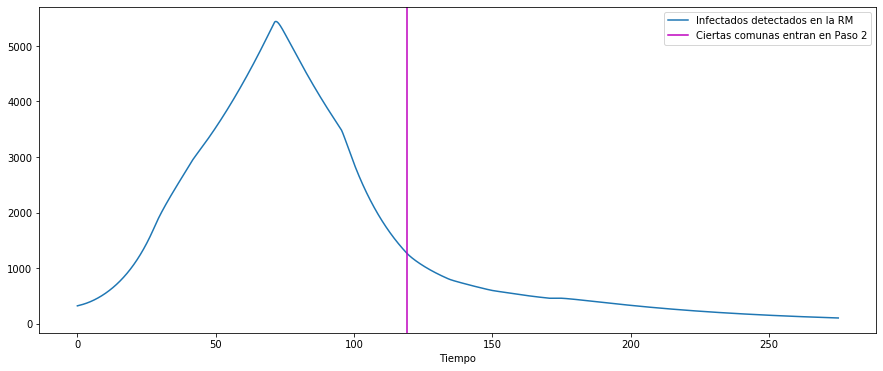

In [121]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados detectados en la RM")
plt.axvline(x=119, color='m',label='Ciertas comunas entran en Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

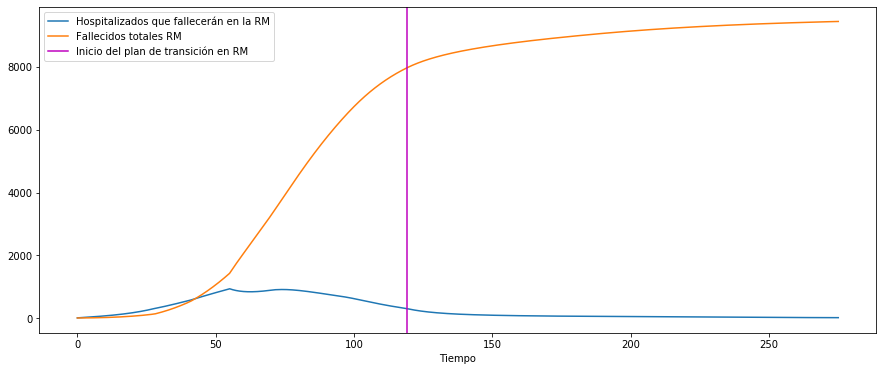

In [123]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,6],label="Hospitalizados que fallecerán en la RM")
plt.plot(t,ans[:,11],label="Fallecidos totales RM")
#plt.plot(118, 9693,'ro',label='Fallecidos hoy')
#plt.plot(118, 2547,'go',label='Hospitalizados que falleceran')
plt.axvline(x=119, color='m',label='Inicio del plan de transición en RM')
plt.legend()
plt.xlabel("Tiempo")
plt.show()